# Ecuación de difusión:
En 1D, tenemos: \\
*(∂^2/∂x^2)Ψ(x,t) = (2/C)(∂/∂t)Ψ(x,t)* \\
En general, esta ecuación está dada de la siguiente manera: \\
*∇^2Ψ(x,t) = (2/C)(∂/∂t)Ψ(x,t)*

**Ejemplo:** Determina la solución de la ecuación de difusión en 1D, considerando que *Ψ(x,0) = δ(x)*.

In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
delta_x = 0.01
X = np.arange(-1,1+delta_x,delta_x) # 1 + delta_x para que termine en 1

In [28]:
# C = 1
delta_t = delta_x**2
T = np.arange(0,0.1+delta_t,delta_t)

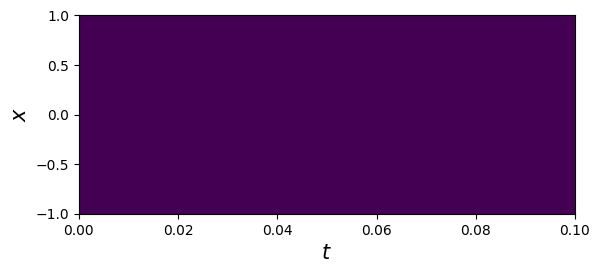

In [29]:
Psi_sol = np.zeros([len(X),len(T)])

plt.imshow(Psi_sol,extent=(min(T),max(T),min(X),max(X)),aspect=0.02)
plt.xlabel('$t$',size = 15)
plt.ylabel('$x$',size = 15)
plt.show()

In [30]:
# Condición inicial: delta de Dirac en x = 0

m = int((len(X)-1)/2) # Indica la posición del x = 0, la mitad de la lista X

In [31]:
# Forma de representar la delta de Dirac computacionalmente:

Psi_sol[m,0] = 1/(2*delta_x)
Psi_sol[m-1,0] = 1/(4*delta_x)
Psi_sol[m+1,0] = 1/(4*delta_x)

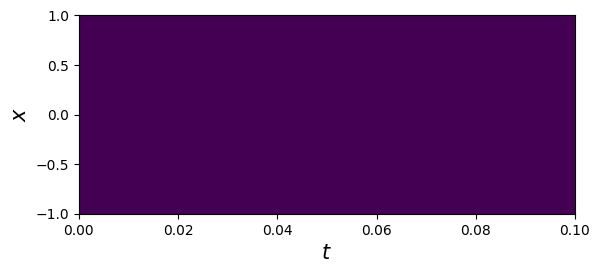

In [32]:
plt.imshow(Psi_sol,extent=(min(T),max(T),min(X),max(X)),aspect=0.02)
plt.xlabel('$t$',size = 15)
plt.ylabel('$x$',size = 15)
plt.show()

# Ahí está la delta de Dirac, pero no se alcanza a apreciar (para que se aprecie, se usa el comando vmax=ALGO en plt.imshow())

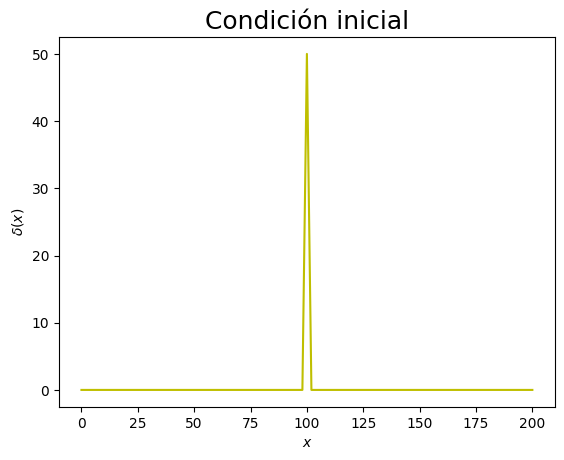

In [33]:
# Delta de Dirac en la primera columna:

plt.plot(Psi_sol[:,0], '-y')
plt.title('Condición inicial',size=18)
plt.xlabel('$x$')
plt.ylabel(r'$\delta(x)$')
plt.show()

In [34]:
# Cálculo de la ecuación de difusión discretizada:

for j in range(0,len(T)-1):
  for i in range(1,len(X)-1):
    Psi_sol[i,j+1] = (Psi_sol[i+1,j]+Psi_sol[i-1,j])/2

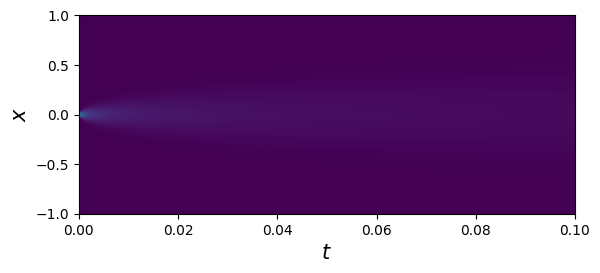

In [25]:
plt.imshow(Psi_sol,extent=(min(T),max(T),min(X),max(X)),aspect=0.02)
plt.xlabel('$t$',size = 15)
plt.ylabel('$x$',size = 15)
plt.show()

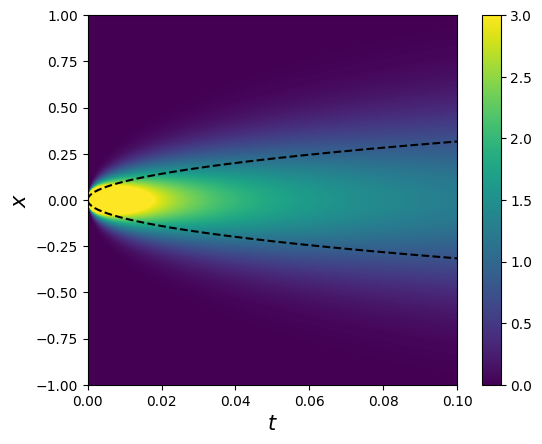

In [90]:
plt.imshow(Psi_sol,extent=(min(T),max(T),min(X),max(X)),aspect=0.05,vmax=3)
plt.plot(T,np.sqrt(T),'--k')
plt.plot(T,-np.sqrt(T),'--k')
plt.xlabel('$t$',size = 15)
plt.ylabel('$x$',size = 15)
plt.colorbar()
plt.show()

A partir de esta información, puedo saber cómo están distribuidas las probabilidades en cualquier tiempo *t* que tenga. Esta distribución es gaussiana.

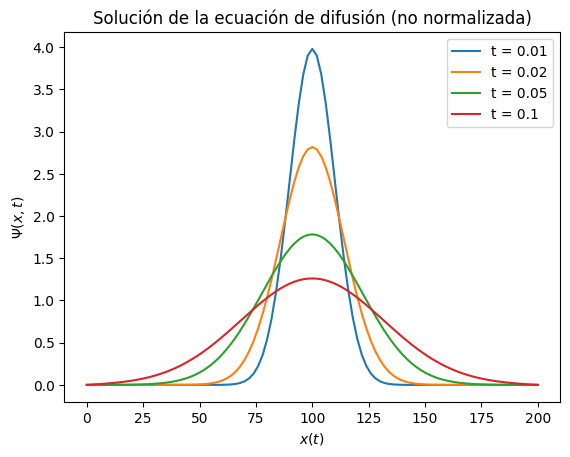

In [47]:
tt = [100,200,500,1000]

for i in tt:
  plt.plot(Psi_sol[:,i],label=f"t = {i*delta_t}")
plt.title('Solución de la ecuación de difusión (numérica)')
plt.xlabel('$x(t)$')
plt.ylabel('$\Psi(x,t)$')
plt.legend()
plt.show()

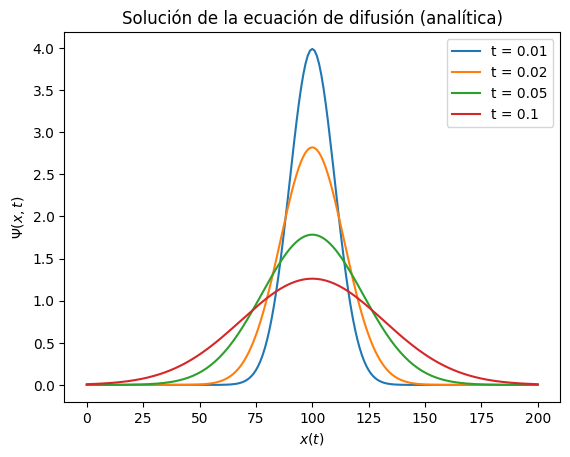

In [53]:
# Una vez normalizada, tenemos la distribución de probabilidades:

for i in tt:
  Psi_normal = np.exp(-X**2/(2*i*delta_t))/np.sqrt(2*np.pi*i*delta_t)
  plt.plot(Psi_normal,label=f"t = {i*delta_t}")
plt.title('Solución de la ecuación de difusión (analítica)')
plt.xlabel('$x(t)$')
plt.ylabel('$\Psi(x,t)$')
plt.legend()
plt.show()

**Ejemplo (Caminantes aleatorios):** Se relaciona con el movimiento browniano.

In [83]:
np.random.choice([-1,1],p=[0.5,0.5])  # x toma valores de -1 o 1 con probabilidad de 0.5 en cada caso

-1

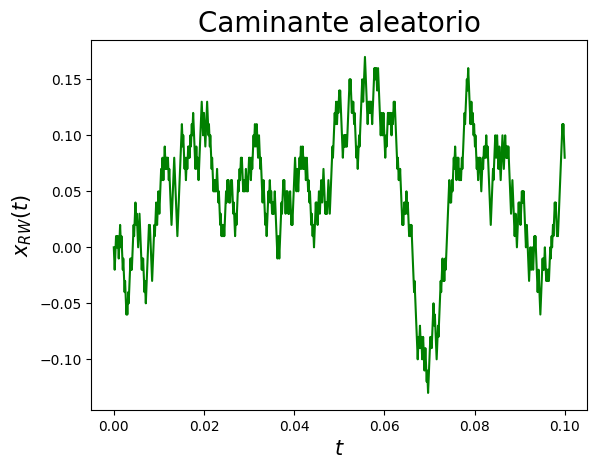

In [84]:
x = 0  # Punto de partida
X_rw = [x]

for t in range(1,len(T)):
  x += delta_x*np.random.choice([-1,1],p=[0.5,0.5])
  X_rw.append(x)
plt.plot(T,X_rw,'-g')
plt.title('Caminante aleatorio',size = 20)
plt.xlabel('$t$',size = 15)
plt.ylabel('$x_{RW}(t)$',size = 15)
plt.show()

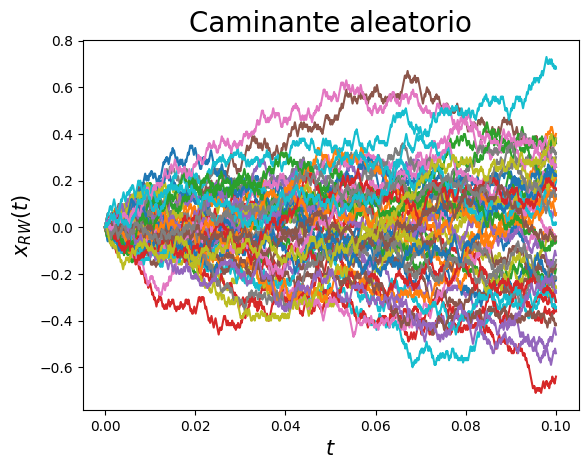

In [87]:
for rr in range(50):
  x = 0
  X_rw = [x]
  for t in range(1,len(T)):
    x += delta_x*np.random.choice([-1,1],p=[0.5,0.5])
    X_rw.append(x)
  plt.plot(T,X_rw)
plt.title('Caminante aleatorio',size = 20)
plt.xlabel('$t$',size = 15)
plt.ylabel('$x_{RW}(t)$',size = 15)
plt.show()

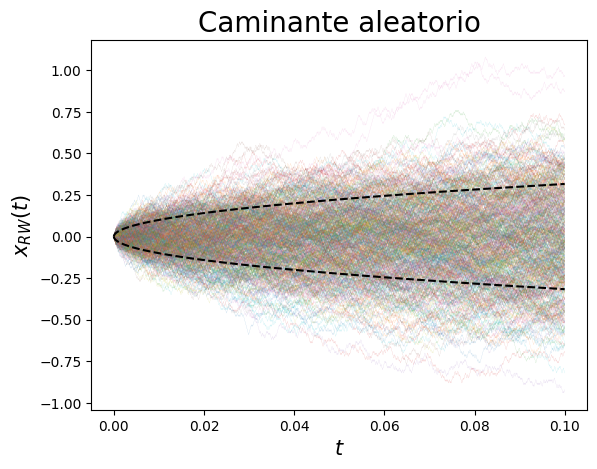

In [92]:
# La ecuación de difusión nos indica cómo crece el conjunto de caminos del caminante aleatorio, en este caso:

for rr in range(500):
  x = 0
  X_rw = [x]
  for t in range(1,len(T)):
    x += delta_x*np.random.choice([-1,1],p=[0.5,0.5])
    X_rw.append(x)
  plt.plot(T,X_rw,alpha=0.5,linewidth=0.1)
plt.plot(T,np.sqrt(T),'--k')  # 1 Desviación estándar \sigma = \sqrt(C*t)
plt.plot(T,-np.sqrt(T),'--k')
plt.title('Caminante aleatorio',size = 20)
plt.xlabel('$t$',size = 15)
plt.ylabel('$x_{RW}(t)$',size = 15)
plt.show()